In [1]:
from sklearn.neighbors import KNeighborsClassifier

In [2]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors.classification:

class KNeighborsClassifier(sklearn.neighbors.base.NeighborsBase, sklearn.neighbors.base.KNeighborsMixin, sklearn.neighbors.base.SupervisedIntegerMixin, sklearn.base.ClassifierMixin)
 |  KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, optional (default = 5)
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : str or callable, optional (default = 'uniform')
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of th

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [4]:
sklearn.__version__

'0.20.1'

Generating the data for KNN
- Generate the values for class 0
    - Generate 50, x1 values within the range 0 to 50
    - Generate 50,x2 values within range 1 to 50
    - create a 2d array with x1 values as 0th element and x2 values as 1st element,3rd value is zero
    - o/p--[[2,5,0],[3,10,0][24,12,0]]
- Generate values for class 1
    - Generate 50, x1 values within the range 50 to 100
    - Generate 50,x2 values within range 1 to 50
    - create a 2d array with x1 values as 0th element and x2 values as 1st element,3rd element is one
- create a 2d Array which consists both classes data
- create a DataFrame from this data with added y column

In [5]:
np.random.seed(10)
x1=np.random.randint(0,50,50)
x2=np.random.randint(1,50,50)
x1,x2

(array([ 9, 36, 15,  0, 49, 28, 25, 29, 48, 29, 49,  8,  9,  0, 42, 40, 36,
        16, 36, 47, 11, 24, 43, 33,  8, 36, 14, 49, 13,  5, 13, 25, 13, 28,
        22, 30, 30, 25, 12,  1, 31, 36, 27, 18, 29, 13, 22, 23, 30, 11]),
 array([29, 11, 25, 10, 16, 19, 17,  8, 25, 12, 18, 47,  8, 12, 29, 34, 21,
        33, 25, 45,  6,  5,  8, 25, 25, 45, 35, 41, 16, 14, 25, 16,  7, 22,
        43, 23, 12, 49, 13, 29, 33, 16, 45, 41, 43, 46, 44, 34, 46, 41]))

In [6]:
np.hstack((x1,x2))

array([ 9, 36, 15,  0, 49, 28, 25, 29, 48, 29, 49,  8,  9,  0, 42, 40, 36,
       16, 36, 47, 11, 24, 43, 33,  8, 36, 14, 49, 13,  5, 13, 25, 13, 28,
       22, 30, 30, 25, 12,  1, 31, 36, 27, 18, 29, 13, 22, 23, 30, 11, 29,
       11, 25, 10, 16, 19, 17,  8, 25, 12, 18, 47,  8, 12, 29, 34, 21, 33,
       25, 45,  6,  5,  8, 25, 25, 45, 35, 41, 16, 14, 25, 16,  7, 22, 43,
       23, 12, 49, 13, 29, 33, 16, 45, 41, 43, 46, 44, 34, 46, 41])

In [7]:
np.vstack((x1,x2))

array([[ 9, 36, 15,  0, 49, 28, 25, 29, 48, 29, 49,  8,  9,  0, 42, 40,
        36, 16, 36, 47, 11, 24, 43, 33,  8, 36, 14, 49, 13,  5, 13, 25,
        13, 28, 22, 30, 30, 25, 12,  1, 31, 36, 27, 18, 29, 13, 22, 23,
        30, 11],
       [29, 11, 25, 10, 16, 19, 17,  8, 25, 12, 18, 47,  8, 12, 29, 34,
        21, 33, 25, 45,  6,  5,  8, 25, 25, 45, 35, 41, 16, 14, 25, 16,
         7, 22, 43, 23, 12, 49, 13, 29, 33, 16, 45, 41, 43, 46, 44, 34,
        46, 41]])

In [8]:
x1_2d=np.expand_dims(x1,1)
x2_2d=np.expand_dims(x2,1)
y_2d=np.expand_dims(np.zeros(50,dtype=int),1)

In [9]:
d0=np.hstack((x1_2d,x2_2d,y_2d))
d0

array([[ 9, 29,  0],
       [36, 11,  0],
       [15, 25,  0],
       [ 0, 10,  0],
       [49, 16,  0],
       [28, 19,  0],
       [25, 17,  0],
       [29,  8,  0],
       [48, 25,  0],
       [29, 12,  0],
       [49, 18,  0],
       [ 8, 47,  0],
       [ 9,  8,  0],
       [ 0, 12,  0],
       [42, 29,  0],
       [40, 34,  0],
       [36, 21,  0],
       [16, 33,  0],
       [36, 25,  0],
       [47, 45,  0],
       [11,  6,  0],
       [24,  5,  0],
       [43,  8,  0],
       [33, 25,  0],
       [ 8, 25,  0],
       [36, 45,  0],
       [14, 35,  0],
       [49, 41,  0],
       [13, 16,  0],
       [ 5, 14,  0],
       [13, 25,  0],
       [25, 16,  0],
       [13,  7,  0],
       [28, 22,  0],
       [22, 43,  0],
       [30, 23,  0],
       [30, 12,  0],
       [25, 49,  0],
       [12, 13,  0],
       [ 1, 29,  0],
       [31, 33,  0],
       [36, 16,  0],
       [27, 45,  0],
       [18, 41,  0],
       [29, 43,  0],
       [13, 46,  0],
       [22, 44,  0],
       [23, 3

In [10]:
np.random.seed(15)
x1=np.random.randint(50,100,50)
x2=np.random.randint(1,50,50)
x1_2d=np.expand_dims(x1,1)
x2_2d=np.expand_dims(x2,1)
y_2d=np.expand_dims(np.ones(50,dtype=int),1)
d1=np.hstack((x1_2d,x2_2d,y_2d))
d1

array([[58,  3,  1],
       [62, 43,  1],
       [55, 33,  1],
       [50, 38,  1],
       [78,  8,  1],
       [77, 25,  1],
       [57, 38,  1],
       [61, 46,  1],
       [71, 20,  1],
       [97, 49,  1],
       [79, 41,  1],
       [67, 30,  1],
       [95, 13,  1],
       [81, 25,  1],
       [73, 47,  1],
       [82, 13,  1],
       [60, 34,  1],
       [65,  3,  1],
       [54, 25,  1],
       [91, 45,  1],
       [89, 43,  1],
       [87, 18,  1],
       [69, 24,  1],
       [94, 30,  1],
       [63, 35,  1],
       [79, 24,  1],
       [65, 19,  1],
       [88, 27,  1],
       [65, 27,  1],
       [99, 17,  1],
       [51, 14,  1],
       [81, 27,  1],
       [82, 33,  1],
       [71,  7,  1],
       [76,  5,  1],
       [84, 29,  1],
       [61, 21,  1],
       [51, 36,  1],
       [90, 40,  1],
       [56, 29,  1],
       [91,  6,  1],
       [84,  1,  1],
       [90, 10,  1],
       [72, 49,  1],
       [90, 21,  1],
       [65, 47,  1],
       [78, 39,  1],
       [85, 3

In [11]:
data=np.vstack((d0,d1))
data

array([[ 9, 29,  0],
       [36, 11,  0],
       [15, 25,  0],
       [ 0, 10,  0],
       [49, 16,  0],
       [28, 19,  0],
       [25, 17,  0],
       [29,  8,  0],
       [48, 25,  0],
       [29, 12,  0],
       [49, 18,  0],
       [ 8, 47,  0],
       [ 9,  8,  0],
       [ 0, 12,  0],
       [42, 29,  0],
       [40, 34,  0],
       [36, 21,  0],
       [16, 33,  0],
       [36, 25,  0],
       [47, 45,  0],
       [11,  6,  0],
       [24,  5,  0],
       [43,  8,  0],
       [33, 25,  0],
       [ 8, 25,  0],
       [36, 45,  0],
       [14, 35,  0],
       [49, 41,  0],
       [13, 16,  0],
       [ 5, 14,  0],
       [13, 25,  0],
       [25, 16,  0],
       [13,  7,  0],
       [28, 22,  0],
       [22, 43,  0],
       [30, 23,  0],
       [30, 12,  0],
       [25, 49,  0],
       [12, 13,  0],
       [ 1, 29,  0],
       [31, 33,  0],
       [36, 16,  0],
       [27, 45,  0],
       [18, 41,  0],
       [29, 43,  0],
       [13, 46,  0],
       [22, 44,  0],
       [23, 3

In [12]:
df=pd.DataFrame(data,columns=['x1','x2','y'])
df.head()

,x1,x2,y
0,9,29,0
1,36,11,0
2,15,25,0
3,0,10,0
4,49,16,0


### scatter plot for the randomly generated data classwise

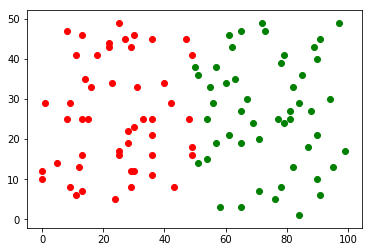

In [13]:
plt.scatter(df['x1'][:50],df['x2'][:50],color='r')
plt.scatter(df['x1'][50:],df['x2'][50:],color='g')

In [14]:
df['x2'][:50]

0     29
1     11
2     25
3     10
4     16
5     19
6     17
7      8
8     25
9     12
10    18
11    47
12     8
13    12
14    29
15    34
16    21
17    33
18    25
19    45
20     6
21     5
22     8
23    25
24    25
25    45
26    35
27    41
28    16
29    14
30    25
31    16
32     7
33    22
34    43
35    23
36    12
37    49
38    13
39    29
40    33
41    16
42    45
43    41
44    43
45    46
46    44
47    34
48    46
49    41
Name: x2, dtype: int32

### Separate the features and outcomes

In [57]:
outcome=df['y']
features=df[['x1','x2']]
# features=df.drop('y',axis=1)
outcome[0],features.iloc[0]

(0, x1     9
 x2    29
 Name: 0, dtype: int32)

In [16]:
type(features)

pandas.core.frame.DataFrame

In [17]:
type(outcome)

pandas.core.series.Series

In [18]:
import math
def Eucledian_distance(p1,p2):
    return math.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2) 

In [19]:
Eucledian_distance((4,3),(0,0))

5.0

In [60]:
def knearest_points(p,d,k):
    """p - new data point
    d- all the features as numpy array
    k - no of neighbours
    returns the k nearest neighbours"""
    # create an empty list to store distances
    distances=[]
    for row in d:
        distances.append(Eucledian_distance(row,p))
    # to convert list to numpy array
    distances=np.array(distances)
    # sort the numpy array get the indices based on sorted values
    # use the indices to get the k nearest neighbours
    return distances.argsort()[:k] 

In [43]:
near_4=knearest_points((5,34),features.values,4)
near_4

array([[ 9, 29],
       [ 1, 29],
       [14, 35],
       [11, 41]])

In [44]:
near_4[:,0]

array([ 9,  1, 14, 11])

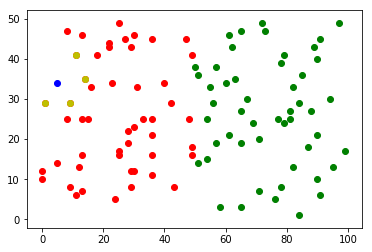

In [45]:
plt.scatter(df['x1'][:50],df['x2'][:50],color='r')
plt.scatter(df['x1'][50:],df['x2'][50:],color='g')
plt.plot(5,34,'bo')
plt.scatter(near_4[:,0],near_4[:,1],color='y')

In [32]:
l=[45,67,45,78,43]
l=np.array(l)
l.argsort()

array([4, 0, 2, 1, 3], dtype=int64)

In [61]:
for row in features.values:
    print(row)
    break

[ 9 29]


In [62]:
ind=knearest_points((5,34),features.values,30)

In [63]:
features.values[ind]

array([[ 9, 29],
       [ 1, 29],
       [14, 35],
       [11, 41],
       [ 8, 25],
       [16, 33],
       [13, 25],
       [ 8, 47],
       [15, 25],
       [13, 46],
       [18, 41],
       [23, 34],
       [22, 43],
       [13, 16],
       [22, 44],
       [ 5, 14],
       [12, 13],
       [ 0, 12],
       [ 0, 10],
       [27, 45],
       [25, 49],
       [29, 43],
       [28, 22],
       [31, 33],
       [25, 17],
       [ 9,  8],
       [25, 16],
       [30, 23],
       [28, 19],
       [30, 46]])

In [64]:
outcome[ind]

0     0
39    0
26    0
49    0
24    0
17    0
30    0
11    0
2     0
45    0
43    0
47    0
34    0
28    0
46    0
29    0
38    0
13    0
3     0
42    0
37    0
44    0
33    0
40    0
6     0
12    0
31    0
35    0
5     0
48    0
Name: y, dtype: int32

In [65]:
outcome[ind].value_counts().argsort()[0]

0

In [66]:
outcome[ind].value_counts()

0    30
Name: y, dtype: int64

In [67]:
outcome[ind].value_counts().index[0]

0

In [69]:
def output(p,k,features,outcome):
    ind=knearest_points((47,25),features.values,10)
    return outcome[ind].value_counts().index[0]
output((34,49),10,features,outcome)

0

In [72]:
for i,feature in features.iterrows():
    print(feature)
    break

x1     9
x2    29
Name: 0, dtype: int32


In [74]:
df.to_csv("data/knn.csv")